# *Model:* ARMA
# *Stock Data:* NSEI
# *Name: *Abbas Amjherawala**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta, timezone
from time import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
_df = pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv', index_col='minute', parse_dates=True)
_df = _df.interpolate()
train_data = _df[:'2020-12-31']
test_data = _df['2021-01-01':]
print(train_data)
print(test_data)

                          ticker    instrument_token      open      high  \
minute                                                                     
2017-01-02 09:15:00+05:30   NSEI  uf-n-1647516806122   8211.70   8211.70   
2017-01-03 09:15:00+05:30   NSEI  uf-n-1647516806122   8195.25   8219.00   
2017-01-04 09:15:00+05:30   NSEI  uf-n-1647516806122   8201.60   8218.45   
2017-01-05 09:15:00+05:30   NSEI  uf-n-1647516806122   8227.75   8282.55   
2017-01-06 09:15:00+05:30   NSEI  uf-n-1647516806122   8283.50   8306.50   
...                          ...                 ...       ...       ...   
2020-12-24 09:15:00+05:30   NSEI  uf-n-1647516806122  13643.95  13771.75   
2020-12-28 09:15:00+05:30   NSEI  uf-n-1647516806122  13824.40  13885.30   
2020-12-29 09:15:00+05:30   NSEI  uf-n-1647516806122  13915.50  13967.60   
2020-12-30 09:15:00+05:30   NSEI  uf-n-1647516806122  13982.90  13997.00   
2020-12-31 09:15:00+05:30   NSEI  uf-n-1647516806122  13978.25  14024.85   

           

In [3]:
prices = _df.close
prices

minute
2017-01-02 09:15:00+05:30     8178.70
2017-01-03 09:15:00+05:30     8188.60
2017-01-04 09:15:00+05:30     8196.55
2017-01-05 09:15:00+05:30     8269.90
2017-01-06 09:15:00+05:30     8247.85
                               ...   
2022-12-26 09:15:00+05:30    18010.30
2022-12-27 09:15:00+05:30    18136.00
2022-12-28 09:15:00+05:30    18109.25
2022-12-29 09:15:00+05:30    18207.10
2022-12-30 09:15:00+05:30    18117.05
Name: close, Length: 1478, dtype: float64

In [4]:
returns = prices.pct_change().dropna()
returns

minute
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.000971
2017-01-05 09:15:00+05:30    0.008949
2017-01-06 09:15:00+05:30   -0.002666
2017-01-09 09:15:00+05:30   -0.001540
                               ...   
2022-12-26 09:15:00+05:30    0.010447
2022-12-27 09:15:00+05:30    0.006979
2022-12-28 09:15:00+05:30   -0.001475
2022-12-29 09:15:00+05:30    0.005403
2022-12-30 09:15:00+05:30   -0.004946
Name: close, Length: 1477, dtype: float64

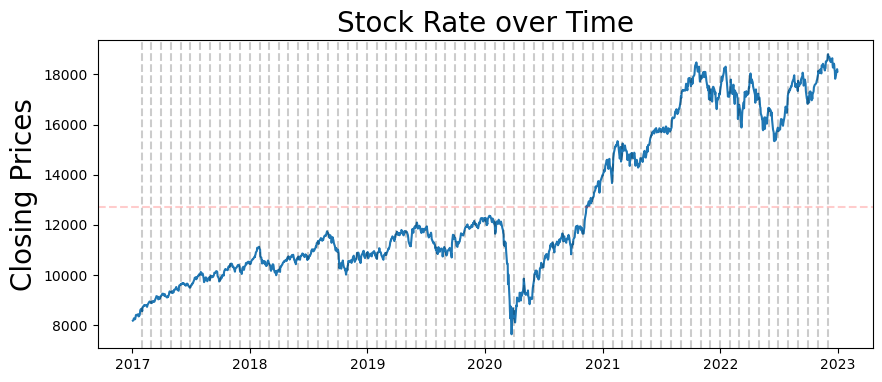

In [5]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Closing Prices', fontsize=20)
plt.title('Stock Rate over Time', fontsize=20)

dates = pd.date_range(start='2017-01-03', end='2022-12-30', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(prices.mean(), color='r', alpha=0.2, linestyle='--')

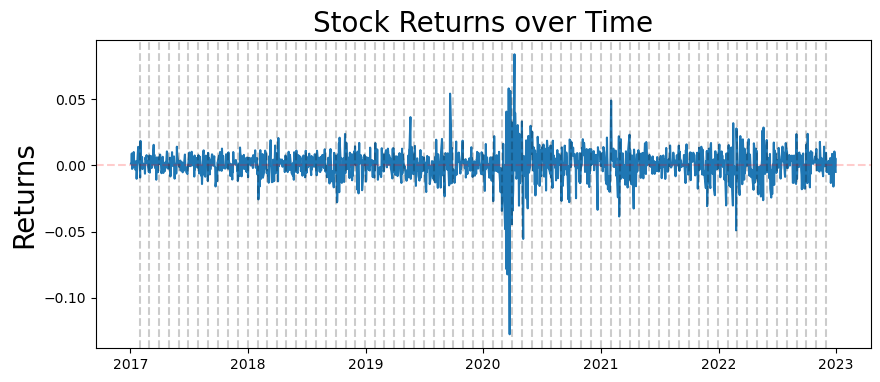

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns', fontsize=20)
plt.title('Stock Returns over Time', fontsize=20)

dates = pd.date_range(start='2017-01-03', end='2022-12-30', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(returns.mean(), color='r', alpha=0.2, linestyle='--')

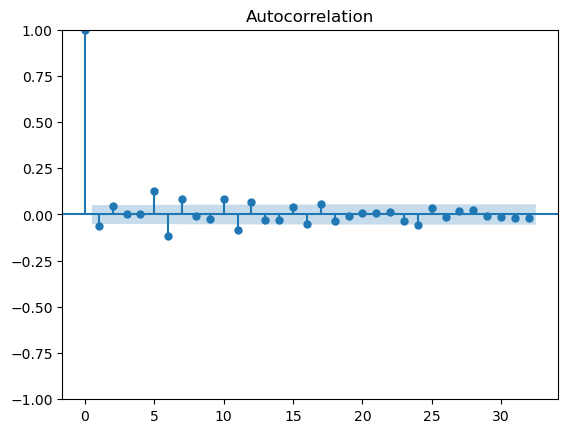

In [7]:
plot_acf(returns)
plt.show()

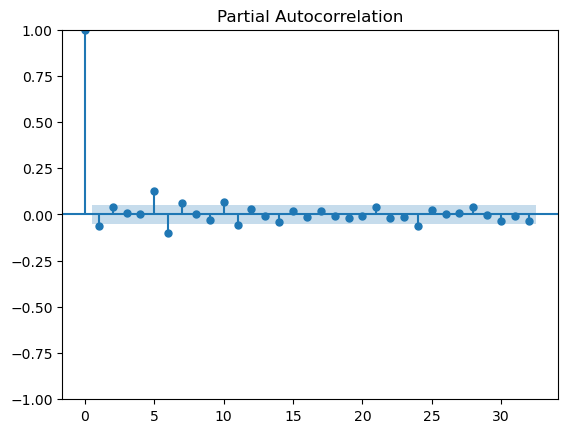

In [8]:
plot_pacf(returns, method='ywm')
plt.show()

In [9]:
import pytz
data_=[]
index_ = test_data.index.tolist()
index_.insert(0, pd.Timestamp('2020-12-31 09:15:00+05:30', tz=pytz.FixedOffset(330)))

try:
    for i in range(1,len(index_)):

        model = ARIMA(train_data['close'], order=(7, 0, 6))
        fitted = model.fit()
        next_day_price = fitted.forecast()
        predicted_price = next_day_price.values[0]
        
        train_data.loc[index_[i]] = test_data.loc[index_[i]]            
        if predicted_price<train_data[index_[i-1].strftime('%Y-%m-%d')].close[0]:
            direction='SELL'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': train_data[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': train_data[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': predicted_price, 'Pnl':train_data[index_[i-1].strftime('%Y-%m-%d')].close[0]-train_data[index_[i].strftime('%Y-%m-%d')].close[0]})
        else:
            direction='BUY'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': train_data[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': train_data[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': predicted_price, 'Pnl':train_data[index_[i].strftime('%Y-%m-%d')].close[0]-train_data[index_[i-1].strftime('%Y-%m-%d')].close[0]})

    
except KeyboardInterrupt or ValueError:
    print("Output is Stored in csv file: NSEI_STOCK.CSV!")

In [10]:
import csv
import os

headers = ['Date', 'Day', 'Current Close Price', 'Next Day Price','Predicted Direction', 'Predicted Value','Pnl']

if os.path.exists('/kaggle/working/nsei_stock.csv'):
    with open('nsei_stock.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in data_:
            writer.writerow(row)
else:
    with open('nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in data_:
            writer.writerow(row)

data_

[{'Date': '2020-12-31',
  'Day': 'Thursday',
  'Current Close Price': 13967.2,
  'Next Day Price': 14015.1,
  'Predicted Direction': 'BUY',
  'Predicted Value': 13981.304007679164,
  'Pnl': 47.899999999999636},
 {'Date': '2021-01-01',
  'Day': 'Friday',
  'Current Close Price': 14015.1,
  'Next Day Price': 14144.5,
  'Predicted Direction': 'BUY',
  'Predicted Value': 14021.56091217044,
  'Pnl': 129.39999999999964},
 {'Date': '2021-01-04',
  'Day': 'Monday',
  'Current Close Price': 14144.5,
  'Next Day Price': 14196.35,
  'Predicted Direction': 'SELL',
  'Predicted Value': 14103.85380586951,
  'Pnl': -51.850000000000364},
 {'Date': '2021-01-05',
  'Day': 'Tuesday',
  'Current Close Price': 14196.35,
  'Next Day Price': 14132.8,
  'Predicted Direction': 'BUY',
  'Predicted Value': 14241.784555044858,
  'Pnl': -63.55000000000109},
 {'Date': '2021-01-06',
  'Day': 'Wednesday',
  'Current Close Price': 14132.8,
  'Next Day Price': 14148.5,
  'Predicted Direction': 'BUY',
  'Predicted Value

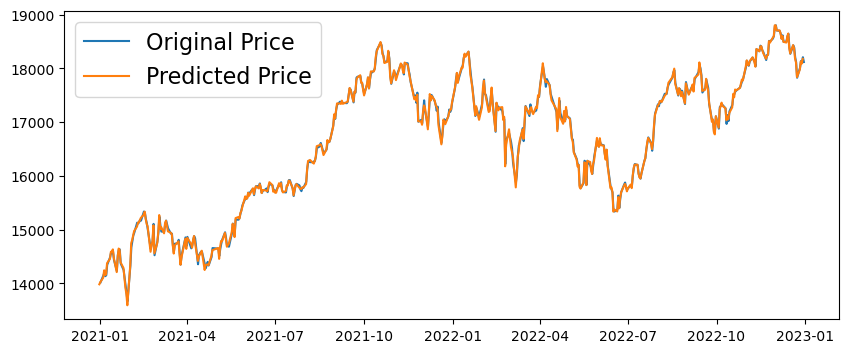

In [11]:
_df = pd.read_csv('/kaggle/working/nsei_stock.csv', index_col='Date', parse_dates=True)
plt.figure(figsize=(10,4))

plt.plot(test_data.close)
plt.plot(_df['Predicted Value'])
plt.legend(('Original Price', 'Predicted Price'), fontsize=16)